In [ ]:
#1) Clean the dataset look and study the dataset for this part

#2) Create a Dictionary with the 10 countries that have the most 'Quantity' ordered except UK

#3)  Find Total Sale between two dates entered

#4) Find each Countries Total SALE to find which Countries is highest potential customer

#5) Which Customer Id has highest purchase in quantity and total and find out the country of it

#6) Which Customer Id has lowest purchase in quantity and total and find out the country of it

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/Online_Retail.csv', encoding='ISO-8859-1')

In [ ]:
df.shape

(541909, 8)

In [ ]:
#1) Clean the dataset look and study the dataset for this part

df_cleaned_data = df.fillna(0, inplace=True)


In [ ]:
df_cleaned_data = df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [ ]:
df_cleaned_data= df['InvoiceDate'] = df['InvoiceDate'].astype(str)
df_cleaned_data= df[['InvoiceDate', 'Time']] = df['InvoiceDate'].str.split(' ', 1, expand=True)
#df_cleaned_data= df.drop(columns=['InvoiceDate'], inplace=True)

<ipython-input-9-4fafaff38f3e>:2: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  df_cleaned_data= df[['InvoiceDate', 'Time']] = df['InvoiceDate'].str.split(' ', 1, expand=True)


In [ ]:
df.describe()

In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Time
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850.0,United Kingdom,08:26:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,17850.0,United Kingdom,08:26:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,17850.0,United Kingdom,08:26:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3.39,17850.0,United Kingdom,08:26:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,17850.0,United Kingdom,08:26:00


In [ ]:
#2) Create a Dictionary with the 10 countries that have the most 'Quantity' ordered except UK. Create a bar chart for this quantity on y axis and countries on x axis

df = df[df['Country'] != 'United Kingdom']

country_quantity = df.groupby('Country')['Quantity'].sum().reset_index()
top_10_countries = country_quantity.sort_values(by='Quantity', ascending=False).head(10)
countries_dict = dict(zip(top_10_countries['Country'], top_10_countries['Quantity']))

print(countries_dict)


{'Germany': 9954, 'France': 7460, 'Netherlands': 6811, 'EIRE': 5360, 'Australia': 5352, 'Japan': 4048, 'Sweden': 4006, 'Norway': 3582, 'Spain': 2139, 'Belgium': 1749}


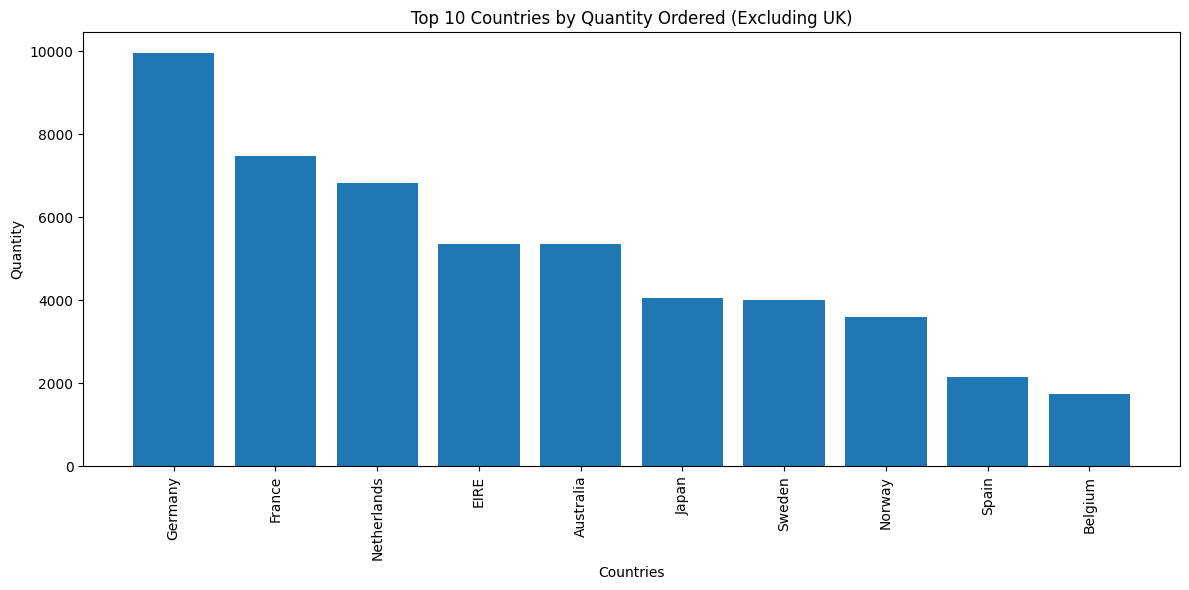

In [ ]:
plt.figure(figsize=(12, 6))
plt.bar(countries_dict.keys(), countries_dict.values())
plt.xlabel('Countries')
plt.ylabel('Quantity')
plt.title('Top 10 Countries by Quantity Ordered (Excluding UK)')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

In [ ]:
#3)  Find Total Sale between two dates entered by user . show a line chart for this

df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

start_date = input("Enter the start date (YYYY-MM-DD): ")
end_date = input("Enter the end date (YYYY-MM-DD): ")

start_date = pd.to_datetime(start_date)
end_date = pd.to_datetime(end_date)
filtered_df = df[(df['InvoiceDate'] >= start_date) & (df['InvoiceDate'] <= end_date)]
total_sale = filtered_df['Quantity'] * filtered_df['UnitPrice']
total_sale = total_sale.sum()

print('Total sale between', start_date ,'and', end_date, 'is', total_sale)

Enter the start date (YYYY-MM-DD): 2010-01-29
Enter the end date (YYYY-MM-DD): 2011-8-12
Total sale between 2010-01-29 00:00:00 and 2011-08-12 00:00:00 is 91775.63


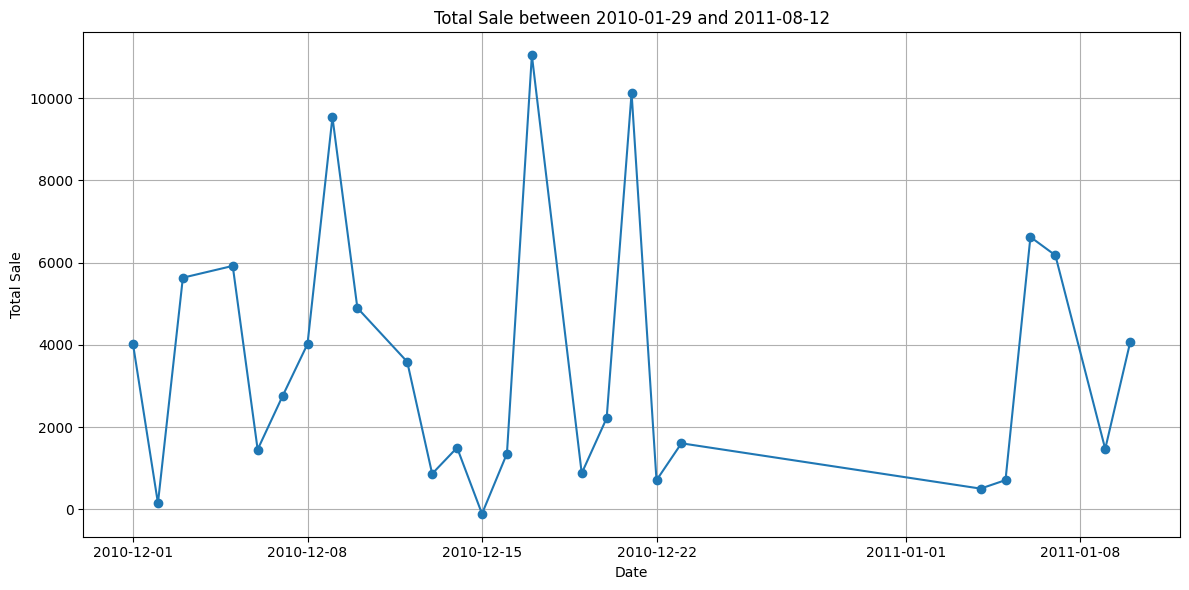

In [ ]:
filtered_df['Total'] = filtered_df['Quantity'] * filtered_df['UnitPrice']
total_sale = filtered_df['Total'].sum()
daily_sales = filtered_df.groupby('InvoiceDate')['Total'].sum().reset_index()

plt.figure(figsize=(12, 6))
plt.plot(daily_sales['InvoiceDate'], daily_sales['Total'], marker='o', linestyle='-')
plt.xlabel('Date')
plt.ylabel('Total Sale')
plt.title(f'Total Sale between {start_date.date()} and {end_date.date()}')
plt.grid(True)

plt.tight_layout()
plt.show()


In [ ]:
#4) Find each Countries Total SALE to find which Countries is highest potential customer do a bar chat for this sale on y axis and countries on x axis

country_sales = df.groupby('Country')['Quantity'].sum().reset_index()
highest_sales_country = country_sales.loc[country_sales['Quantity'].idxmax()]

print('Country with the highest total sales:', highest_sales_country, 'Total Sales:', highest_sales_country["Quantity"])


Country with the highest total sales: Country     Germany
Quantity       9954
Name: 10, dtype: object Total Sales: 9954


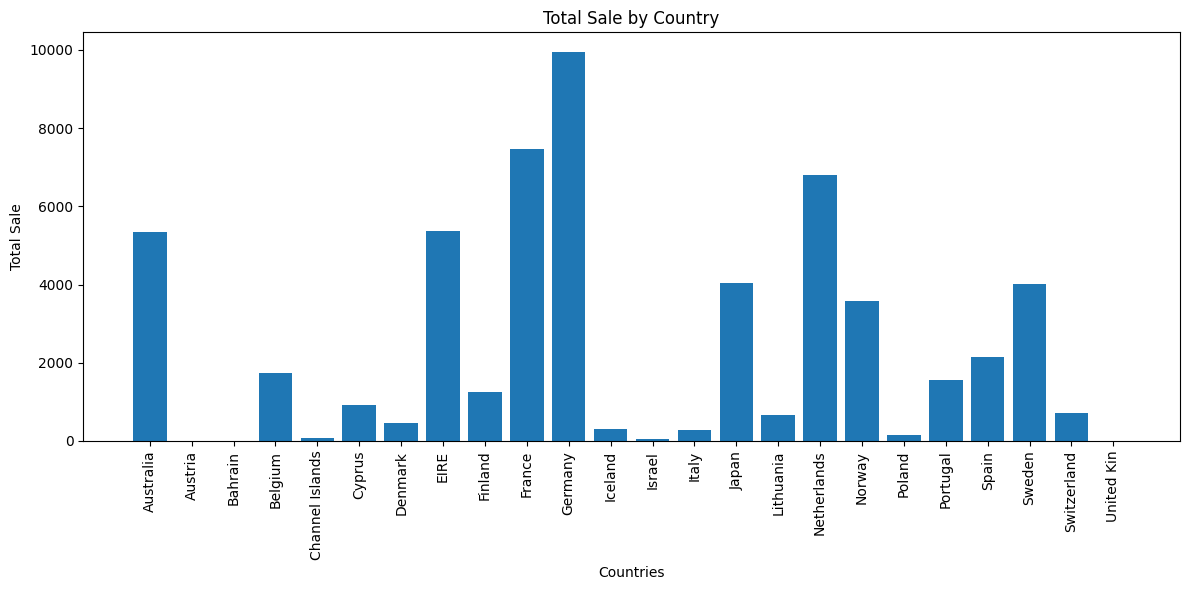

In [ ]:
plt.figure(figsize=(12, 6))
plt.bar(country_sales['Country'], country_sales['Quantity'])
plt.xlabel('Countries')
plt.ylabel('Total Sale')
plt.title('Total Sale by Country')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()


In [ ]:
#5) Which Customer Id has highest purchase in quantity and total and find out the country of it

df['TotalCost'] = df['Quantity'] * df['UnitPrice']

highest_quantity = df[df['Quantity'] == df['Quantity'].max()]['CustomerID'].iloc[0]
highest_total_cost = df[df['TotalCost'] == df['TotalCost'].max()]['CustomerID'].iloc[0]
country_highest_quantity = df[df['CustomerID'] == highest_quantity]['Country'].iloc[0]
country_highest_total_cost = df[df['CustomerID'] == highest_total_cost]['Country'].iloc[0]

print("Customer ID with the highest purchase in quantity:",highest_quantity)
print("Country of the highest quantity customer:",country_highest_quantity)

print("Customer ID with the highest purchase in total cost:", highest_total_cost)
print("Country of the highest total cost customer:",country_highest_total_cost)


Customer ID with the highest purchase in quantity: 12755.0
Country of the highest quantity customer: Japan
Customer ID with the highest purchase in total cost: 12755.0
Country of the highest total cost customer: Japan


In [ ]:
#6) Which Customer Id has lowest purchase in quantity and total and find out the country of it

df['TotalCost'] = df['Quantity'] * df['UnitPrice']

lowest_quantity = df[df['Quantity'] == df['Quantity'].min()]['CustomerID'].iloc[0]
lowest_total_cost = df[df['TotalCost'] == df['TotalCost'].min()]['CustomerID'].iloc[0]
country_lowest_quantity = df[df['CustomerID'] == lowest_quantity]['Country'].iloc[0]
country_lowest_total_cost = df[df['CustomerID'] == lowest_total_cost]['Country'].iloc[0]

print("Customer ID with the lowest purchase in quantity:", lowest_quantity)
print("Country of the lowest quantity customer:" ,country_lowest_quantity)

print("Customer ID with the lowest purchase in total cost:" ,lowest_total_cost)
print("Country of the lowest total cost customer:",country_lowest_total_cost)


Customer ID with the lowest purchase in quantity: 17404.0
Country of the lowest quantity customer: Sweden
Customer ID with the lowest purchase in total cost: 17404.0
Country of the lowest total cost customer: Sweden


In [ ]:
#7) Find the biggest order In Sale (Cost) which country was the order from and fiind total purchase (Cost) done by that customer ID

df['TotalCost'] = df['Quantity'] * df['UnitPrice']
biggest_order = df[df['TotalCost'] == df['TotalCost'].max()]

country_of_biggest_order = biggest_order['Country'].iloc[0]
customer_id_of_biggest_order = biggest_order['CustomerID'].iloc[0]
total_purchase_cost_by_customer = df[df['CustomerID'] == customer_id_of_biggest_order]['TotalCost'].sum()


print('The biggest order was from: ',country)
print('Total purchase (cost) done by Customer ID:',total_purchase)


NameError: ignored

In [ ]:
#8) Find how many different customers are available for each country save the count in dictionary also return countries with highest and lowest customer count , do bar chart for customer count. customer count on x axis and countries on y axis

customer_counts = {}
for country, group in df.groupby('Country'):
    unique_customers = group['CustomerID'].nunique()
    customer_counts[country] = unique_customers

highest_customer_country = max(customer_counts, key=customer_counts.get)
lowest_customer_country = min(customer_counts, key=customer_counts.get)
print('The countries with highest customer count:',highest_customer_country)
print('The countries with lowest customer count:',lowest_customer_country)

The countries with highest customer count: Germany
The countries with lowest customer count: Bahrain


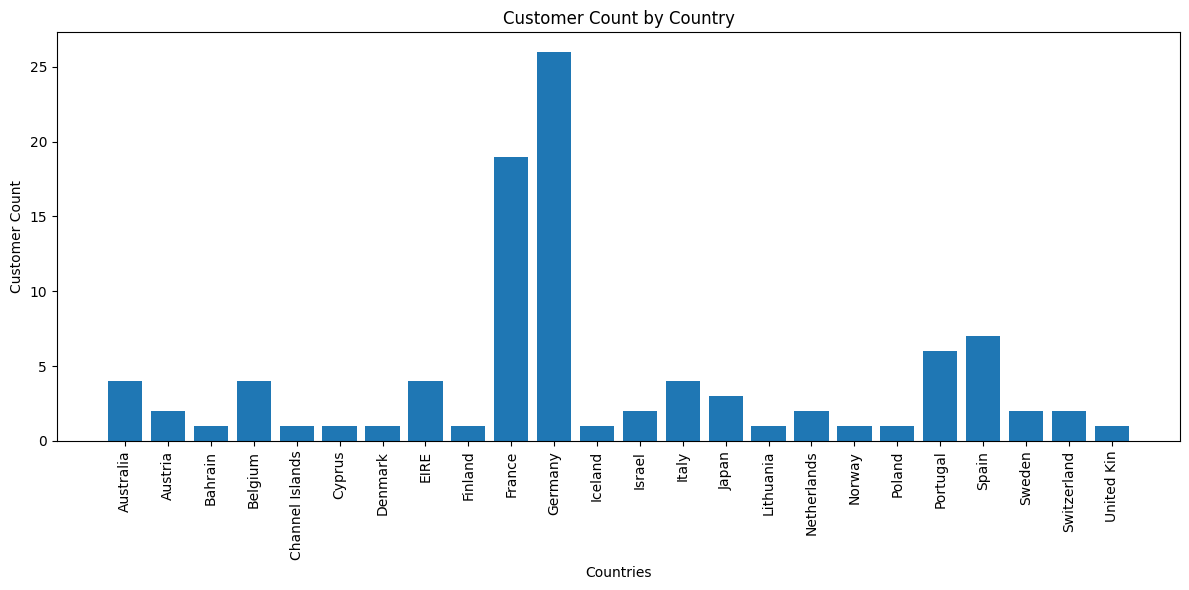

In [ ]:
plt.figure(figsize=(12, 6))
plt.bar(customer_counts.keys(), customer_counts.values())
plt.xlabel('Countries')
plt.ylabel('Customer Count')
plt.title('Customer Count by Country')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

In [ ]:
#9) Find which stock code was ordered the most by each country

country_stock_counts = df.groupby(['Country', 'StockCode']).size().reset_index(name='Count')
idx = country_stock_counts.groupby(['Country'])['Count'].transform(max) == country_stock_counts['Count']
most_ordered = country_stock_counts[idx]
print("Stock Code Ordered the Most by Each Country:",most_ordered)

Stock Code Ordered the Most by Each Country:           Country StockCode  Count
3       Australia     20685      2
29      Australia     22195      2
30      Australia     22196      2
73      Australia     48138      2
80        Austria     21428      1
...           ...       ...    ...
2256  Switzerland     22837      1
2257  Switzerland     22953      1
2258  Switzerland     84050      1
2259  Switzerland      POST      1
2260   United Kin     22348      1

[255 rows x 3 columns]
